In [ ]:
#1
"""Реализуйте функцию cosine_similarity(a, b), которая вычисляет косинусную близость между двумя векторами. 
Косинусная близость измеряет косинус угла между векторами и показывает их семантическую схожесть.
Функция должна:
    Принимать два вектора (списки чисел)
    Возвращать число от -1 до 1
    Обрабатывать случай нулевых векторов
    Проверять одинаковую размерность векторов
Формула: cos(θ) = (A·B) / (||A|| * ||B||)

Test_1
a = [1, 2, 3]
b = [1, 2, 3]
result = cosine_similarity(a, b)
print(f"Идентичные векторы: {result}")
    
Test_2
a = [1, 0, 0]
b = [-1, 0, 0]
result = cosine_similarity(a, b)
print(f"Противоположные векторы: {result}")
    
Test_3
a = [1, 0]
b = [0, 1]
result = cosine_similarity(a, b)
print(f"Перпендикулярные векторы: {result}")
    
Test_4
a = [1, 2, 3]
b = [1, 2, 4]
result = cosine_similarity(a, b)
print(f"Похожие векторы: {result} ")

ПРИМЕЧАНИЕ
Если один из векторов изменить надпись в принте "Идентичные векторы","Похожие векторы"  тоже должна измениться"""

In [3]:
def cosine_similarity(a, b):
    dot = sum(a_i * b_i for a_i, b_i in zip(a, b))
    prod_lens = sum(p**2 for p in a)**0.5 * sum(p**2 for p in b)**0.5

    if prod_lens == 0: print("vector was dot")

    return dot / prod_lens

def print_sem(a, b):
    cos = cosine_similarity(a, b)

    match cos:
        case 1: print(f"Идентичные векторы: {cos}")
        case 0: print(f"Перпендикулярные векторы: {cos}")
        case -1: print(f"Противоположные векторы: {cos}")
        case _: print(f"Похожие векторы: {cos}")

a = [1, 2, 3]
b = [1, 2, 3]
result = cosine_similarity(a, b)
print_sem(a, b)
    
a = [1, 0, 0]
b = [-1, 0, 0]
print_sem(a, b)
    
a = [1, 0]
b = [0, 1]
print_sem(a, b)
    
a = [1, 2, 3]
b = [1, 2, 4]
print_sem(a, b)

Идентичные векторы: 1.0
Противоположные векторы: -1.0
Перпендикулярные векторы: 0.0
Похожие векторы: 0.9914601339836675


In [ ]:
#2
"""Создайте функцию visualize_similarities(target_word, words_dict, top_k=5), которая визуализирует семантическую близость 
слов с помощью столбчатой диаграммы.
Необходимо:
    Использовать matplotlib для визуализации
    Показывать значения схожести на столбцах
    Автоматически подбирать цвета
    Корректно обрабатывать подписи осей
В качестве примера выберите любой словарь.

dict1 = {'телефон': [0.9, 0.1, 0.8],
        'смартфон': [0.8, 0.2, 0.7],
        'компьютер': [0.7, 0.3, 0.6],
        'ноутбук': [0.6, 0.4, 0.5],
        'книга': [0.1, 0.9, 0.2],  
        'блокнот': [0.2, 0.8, 0.3]}
        
dict2 = {'радость': [0.9, 0.1, 0.8],
            'счастье': [0.8, 0.2, 0.7],
            'грусть': [0.1, 0.9, 0.2],
            'печаль': [0.2, 0.8, 0.3],
            'злость': [0.3, 0.7, 0.1],
            'гнев': [0.4, 0.6, 0.2]}
            
dict3 = {'врач': [0.9, 0.1, 0.8, 0.2],
               'медсестра': [0.8, 0.2, 0.7, 0.3],
               'учитель': [0.7, 0.3, 0.6, 0.4],
               'программист': [0.6, 0.4, 0.2, 0.9],
               'повар': [0.5, 0.5, 0.5, 0.5],
               'водитель': [0.4, 0.6, 0.3, 0.7]}"""

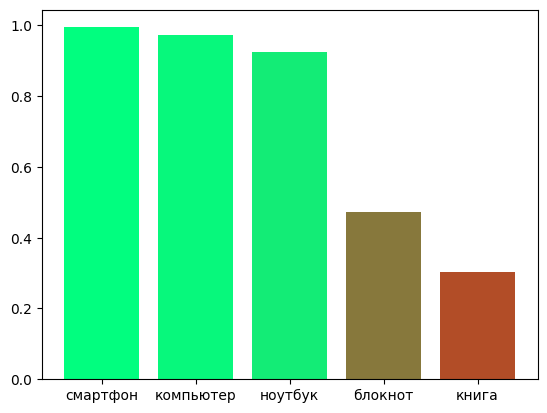

In [23]:
import matplotlib.pyplot as plt

def cosine_similarity(a, b):
    dot = sum(a_i * b_i for a_i, b_i in zip(a, b))
    prod_lens = sum(p**2 for p in a)**0.5 * sum(p**2 for p in b)**0.5

    if prod_lens == 0: print("vector was dot")

    return dot / prod_lens

def visualize_similarities(target_word, words_dict, top_k=5):
    semilars = []
    target_vec = words_dict[target_word]
    for k, v in words_dict.items():
        if k == target_word: continue
        semilars.append((k, cosine_similarity(v, target_vec)))

    semilars.sort(key = lambda x: x[1], reverse = True)

    semilars = semilars[:top_k]

    colors = [(1 - w[1], w[1], 0.5 * w[1]) for w in semilars]

    plt.bar(*zip(*semilars), color=colors)

    plt.show()        

dict1 = {'телефон': [0.9, 0.1, 0.8],
        'смартфон': [0.8, 0.2, 0.7],
        'компьютер': [0.7, 0.3, 0.6],
        'ноутбук': [0.6, 0.4, 0.5],
        'книга': [0.1, 0.9, 0.2],  
        'блокнот': [0.2, 0.8, 0.3]}

visualize_similarities('телефон', dict1)

In [ ]:
#3
"""Напишите программу, которая получает и выводит на экран все книги (сами выберите какие) из таблицы books тремя способами:
1.  Получить все записи с помощью fetchall().
2.  Получить записи по одной с помощью fetchone() в цикле.
3.  Получить первые 3 записи с помощью fetchmany(3).

книга в таблице это - название книги, автор, год издания
"""

In [1]:
import sqlite3 as sql

conn = sql.connect('books.db')

cur = conn.cursor()
cur.execute(
"""CREATE TABLE books(
        title TEXT, 
        autchor TEXT, 
        year INTEGER
    )
"""
)

books = (
    ("Программирование на C# для начинающих. Основные сведения", "Алексей Николаевич Васильев", 2022),
    ("1984", "Джордж Оруэээ", 1948),
    ("Цветы для Элджернона", "Дэниел Киз", 1966),
    ("Грокаем алгоритмы", "Адитья Бхаргава", 2017),
    ("Паттерны объектно-ориентированного проектирования", "Эрих Гамма, Ричард Хелм, Ральф Джонсон, Джон Влиссидес", 1994)
)

cur.executemany("INSERT INTO books (title, autchor, year) VALUES (?, ?, ?)", books)
            
cur.execute("SELECT * FROM books")
for b in cur.fetchall():
    print(b)

print()

cur.execute("SELECT * FROM books")
book = cur.fetchone()

while book:
    print(book)
    book = cur.fetchone()

print()
cur.execute("SELECT * FROM books")
for b in cur.fetchmany(3):
    print(b)

cur.execute("DROP TABLE books")

('Программирование на C# для начинающих. Основные сведения', 'Алексей Николаевич Васильев', 2022)
('1984', 'Джордж Оруэээ', 1948)
('Цветы для Элджернона', 'Дэниел Киз', 1966)
('Грокаем алгоритмы', 'Адитья Бхаргава', 2017)
('Паттерны объектно-ориентированного проектирования', 'Эрих Гамма, Ричард Хелм, Ральф Джонсон, Джон Влиссидес', 1994)

('Программирование на C# для начинающих. Основные сведения', 'Алексей Николаевич Васильев', 2022)
('1984', 'Джордж Оруэээ', 1948)
('Цветы для Элджернона', 'Дэниел Киз', 1966)
('Грокаем алгоритмы', 'Адитья Бхаргава', 2017)
('Паттерны объектно-ориентированного проектирования', 'Эрих Гамма, Ричард Хелм, Ральф Джонсон, Джон Влиссидес', 1994)

('Программирование на C# для начинающих. Основные сведения', 'Алексей Николаевич Васильев', 2022)
('1984', 'Джордж Оруэээ', 1948)
('Цветы для Элджернона', 'Дэниел Киз', 1966)
